#Practical 2 (due next practical): 
Exercise in Building Tools to Analyze Sequence Data Quality

Data files: seq_reads
Contains three short read .fasta data files with sequences of various quality
Challenge #1: DS1, DS2 are synthetic DNA data sets 
Build two tools (R or python3) to visualize and analyze data quality:
1. Plot DNA length v. Q, length v. number of N ambiguities, Q v. N
2. generate a heatmap comparing the two data sets


# Challenge #1 #

In [32]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [33]:
# Getting familiar with data
ds1 = SeqIO.parse('./seq_reads/DS1.fasta', "fasta")
print(ds1)

#### `SeqRecord` Attributes

| Attribute             | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `.id`                 | The identifier (usually the first word after `>` in the FASTA header)       |
| `.name`               | A "common" name (may be same as `id` or a simplified form)                  |
| `.description`        | Full description line (everything after `>` in the header)                  |
| `.seq`                | The actual sequence (as a `Seq` object)                                     |
| `.letter_annotations` | Dictionary of per-letter annotations (e.g., quality scores for FASTQ)       |
| `.annotations`        | Dictionary for any general record-level annotations                         |
| `.features`           | List of `SeqFeature` objects (used in GenBank format mainly)                |
| `.dbxrefs`            | List of cross-references to databases                                       |
| `.format()`           | Method: convert the record back to a string in a given file format (e.g., FASTA) |


In [ ]:
# Data expolration
# Checking access to a single record
records_ds1= list(SeqIO.parse('./seq_reads/DS1.fasta', "fasta"))
print(type(records_ds1[0]))
print(records_ds1[0])

<class 'Bio.SeqRecord.SeqRecord'>
ID: DS1_read_00001
Name: DS1_read_00001
Description: DS1_read_00001 set=C q=6 len=529
Number of features: 0
Seq('GCCCAATAAACCACTCTGACTGGCCGAATAGGGATATAGGCAACGACATGTGCG...ACT')


In [31]:
# Checking access to data attributes
str(records_ds1[10].seq).count("N")

1

#### Start executing from here ###

In [ ]:
# Creating a function that creates df with parameters to be analyzed/plotted
def analyze_fasta(fasta_file, dataset_name):
    data = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq = str(record.seq)
        n_count = seq.count("N")

        # Ectracting q and len from the description
        desc = record.description
        q_match = re.search(r"q=(\d+)", desc)
        len_match = re.search(r"len=(\d+)", desc)

        q = int(q_match.group(1)) if q_match else None
        length = int(len_match.group(1)) if len_match else len(seq)

        data.append({
            "id": record.id,
            "length": length,
            "q": q,
            "N_count": n_count,
            "dataset": dataset_name
        })
    return pd.DataFrame(data)

In [42]:
# Analyzing DS1
ds1_df=analyze_fasta('./seq_reads/DS1.fasta', 'DS1')

print(ds1_df.head())

               id  length   q  N_count dataset
0  DS1_read_00001     529   6        3     DS1
1  DS1_read_00002     214   8        1     DS1
2  DS1_read_00003     378  17        2     DS1
3  DS1_read_00004     470  29        1     DS1
4  DS1_read_00005     265  26        1     DS1


In [73]:
# Analyzing DS2
ds2_df=analyze_fasta('./seq_reads/DS2.fasta', 'DS2')

print(ds2_df.head())

               id  length   q  N_count dataset
0  DS2_read_00001     404   6        2     DS2
1  DS2_read_00002     296  13        2     DS2
2  DS2_read_00003     372   8        7     DS2
3  DS2_read_00004     194  12        1     DS2
4  DS2_read_00005     419  34        0     DS2


In [74]:
ds2_df.describe()

,length,q,N_count
count,10000.000000,10000.000000,10000.000000
mean,398.839500,21.068700,1.998200
std,145.116523,9.022002,2.028844
min,150.000000,6.000000,0.000000
25%,273.000000,13.000000,0.000000
50%,400.000000,21.000000,1.000000
75%,524.000000,29.000000,3.000000
max,650.000000,36.000000,15.000000


### Length vs Q

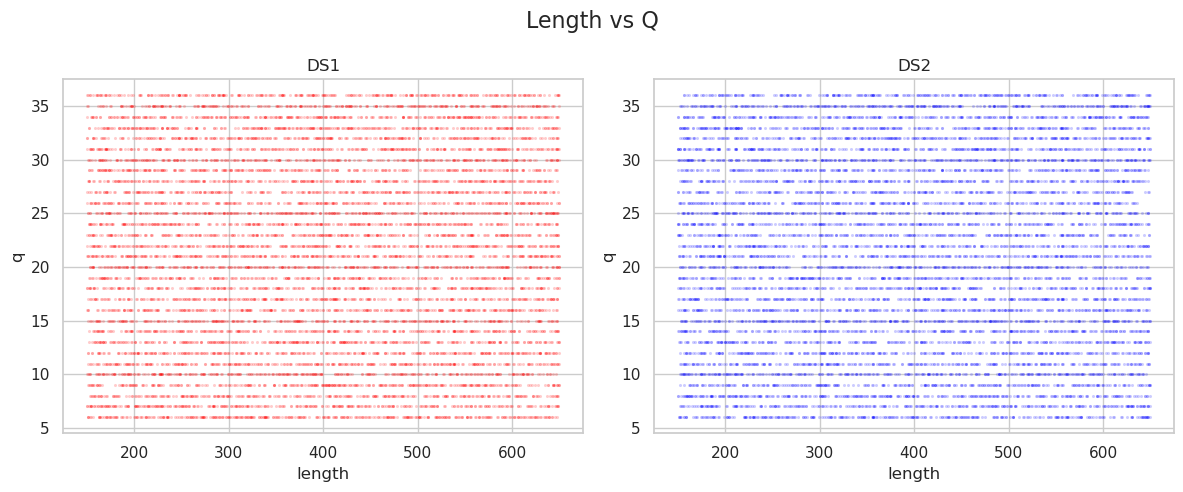

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.scatterplot(data=ds1_df, x="length", y="q", color="red", alpha=0.2, s=5, ax=axes[0])
axes[0].set_title("DS1")
sns.scatterplot(data=ds2_df, x="length", y="q", color="blue", alpha=0.2, s=5, ax=axes[1])
axes[1].set_title("DS2")

fig.suptitle("Length vs Q", fontsize=16)

plt.tight_layout()
plt.show()

In [61]:
# sns.set_theme(style="whitegrid")
# # Length vs Q
# plt.figure(figsize=(6,4))
# sns.scatterplot(data=ds1_df, x="length", y="q", hue="dataset", alpha=0.2, s=5)
# plt.title("Length vs Q")
# plt.show()

In [60]:
# sns.set_theme(style="whitegrid")
# # Length vs Q
# plt.figure(figsize=(6,4))
# sns.scatterplot(data=ds2_df, x="length", y="q", hue="dataset", alpha=0.2, s=5)
# plt.title("Length vs Q")
# plt.show()

### Length vs N_count

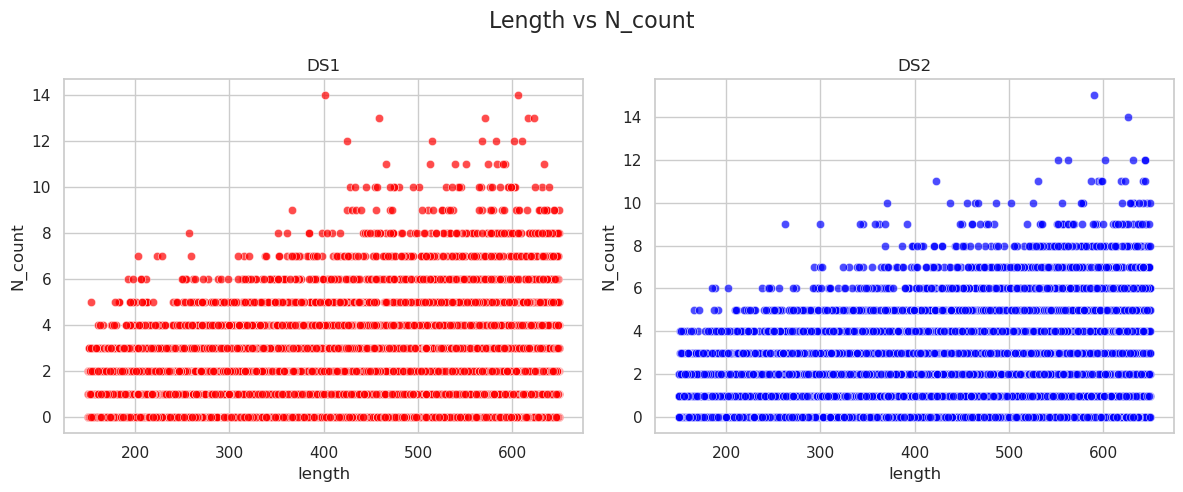

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.scatterplot(data=ds1_df, x="length", y="N_count", color="red", alpha=0.7, ax=axes[0])
axes[0].set_title("DS1")
sns.scatterplot(data=ds2_df, x="length", y="N_count", color="blue", alpha=0.7, ax=axes[1])
axes[1].set_title("DS2")

fig.suptitle("Length vs N_count", fontsize=16)

plt.tight_layout()
plt.show()

In [64]:
# # Length vs N_count
# plt.figure(figsize=(6,4))
# sns.scatterplot(data=ds1_df, x="length", y="N_count", hue="dataset", alpha=0.7)
# plt.title("Length vs N_count")
# plt.show()

In [65]:
# plt.figure(figsize=(6,4))
# sns.scatterplot(data=ds2_df, x="length", y="N_count", hue="dataset", alpha=0.7)
# plt.title("Length vs N_count")
# plt.show()

### Q vs N_count ###

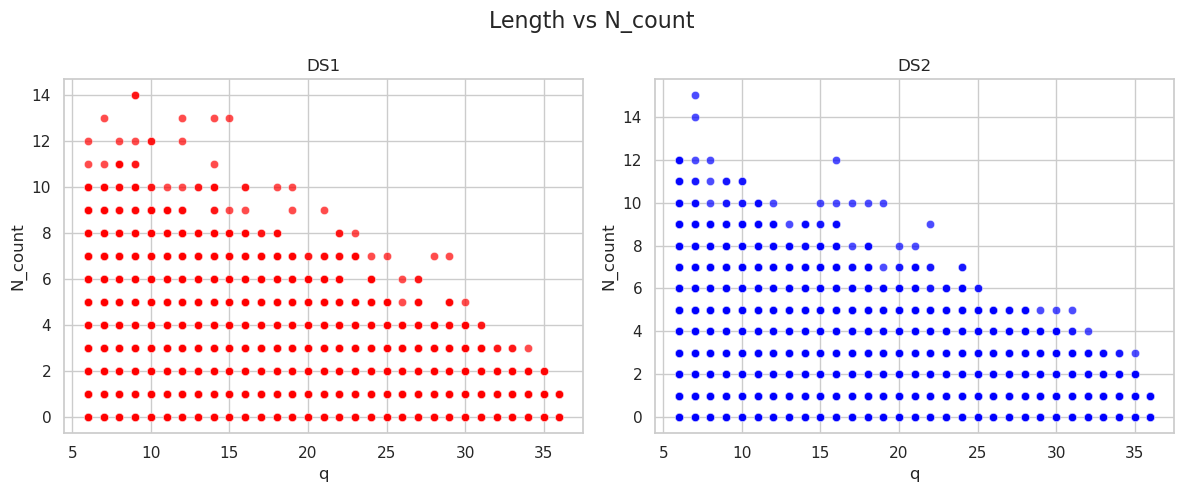

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.scatterplot(data=ds1_df, x="q", y="N_count", color="red", alpha=0.7, ax=axes[0])
axes[0].set_title("DS1")
sns.scatterplot(data=ds2_df, x="q", y="N_count", color="blue", alpha=0.7, ax=axes[1])
axes[1].set_title("DS2")

fig.suptitle("Length vs N_count", fontsize=16)

plt.tight_layout()
plt.show()

In [70]:
# plt.figure(figsize=(6,4))
# sns.scatterplot(data=ds1_df, x="q", y="N_count", hue="dataset", alpha=0.7)
# plt.title("Q vs N_count")
# plt.show()

In [71]:
# plt.figure(figsize=(6,4))
# sns.scatterplot(data=ds2_df, x="q", y="N_count", hue="dataset", alpha=0.7)
# plt.title("Q vs N_count")
# plt.show()

/tmp/ipykernel_208205/453986108.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["q_bin", "length_bin"])
/tmp/ipykernel_208205/453986108.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["q_bin", "length_bin"])


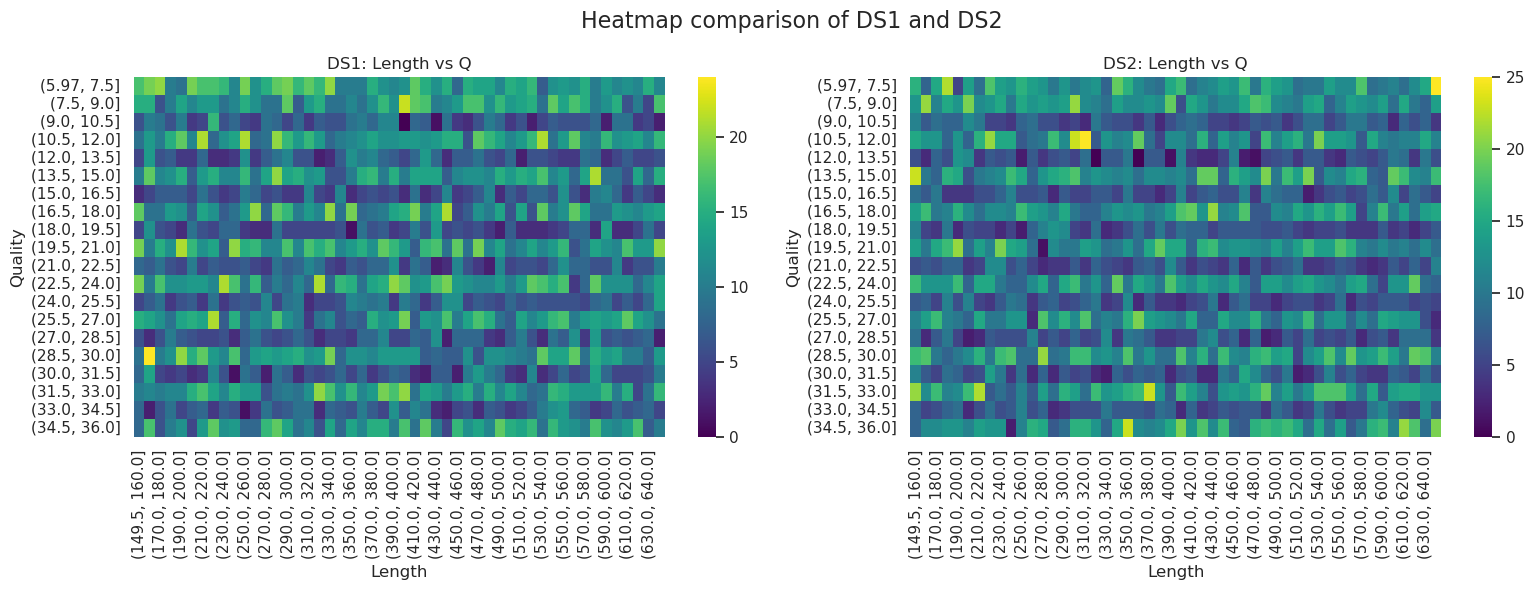

In [ ]:
def make_heatmap(df, dataset_name, ax):
    # Bin length and quality
    df["length_bin"] = pd.cut(df["length"], bins=50)
    df["q_bin"] = pd.cut(df["q"], bins=20)

    # Count reads per bin
    heatmap_data = (
        df.groupby(["q_bin", "length_bin"])
          .size()
          .reset_index(name="count")
    )

    # Pivot into 2D matrix
    matrix = heatmap_data.pivot(
        index="q_bin", columns="length_bin", values="count"
    ).fillna(0)

    # Plot heatmap
    sns.heatmap(matrix, cmap="viridis", ax=ax)
    ax.set_title(f"{dataset_name}: Length vs Q")
    ax.set_xlabel("Length")
    ax.set_ylabel("Quality")

# Plot DS1 and DS2 side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

make_heatmap(ds1_df.copy(), "DS1", axes[0])
make_heatmap(ds2_df.copy(), "DS2", axes[1])

plt.suptitle("Heatmap comparison of DS1 and DS2", fontsize=16)
plt.tight_layout()
plt.show()